### Employee attrition Prediction -Classification:

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [70]:
df=pd.read_csv(r'C:\Users\Aishwarya\Desktop\FINAL PROJECT\IMPLEMENTATION\employee_attrition.csv.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [71]:
df.shape

(1470, 35)

In [59]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

**There are more skewness in some of the datasets.**

In [60]:
# Checkign for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**There are no null values**

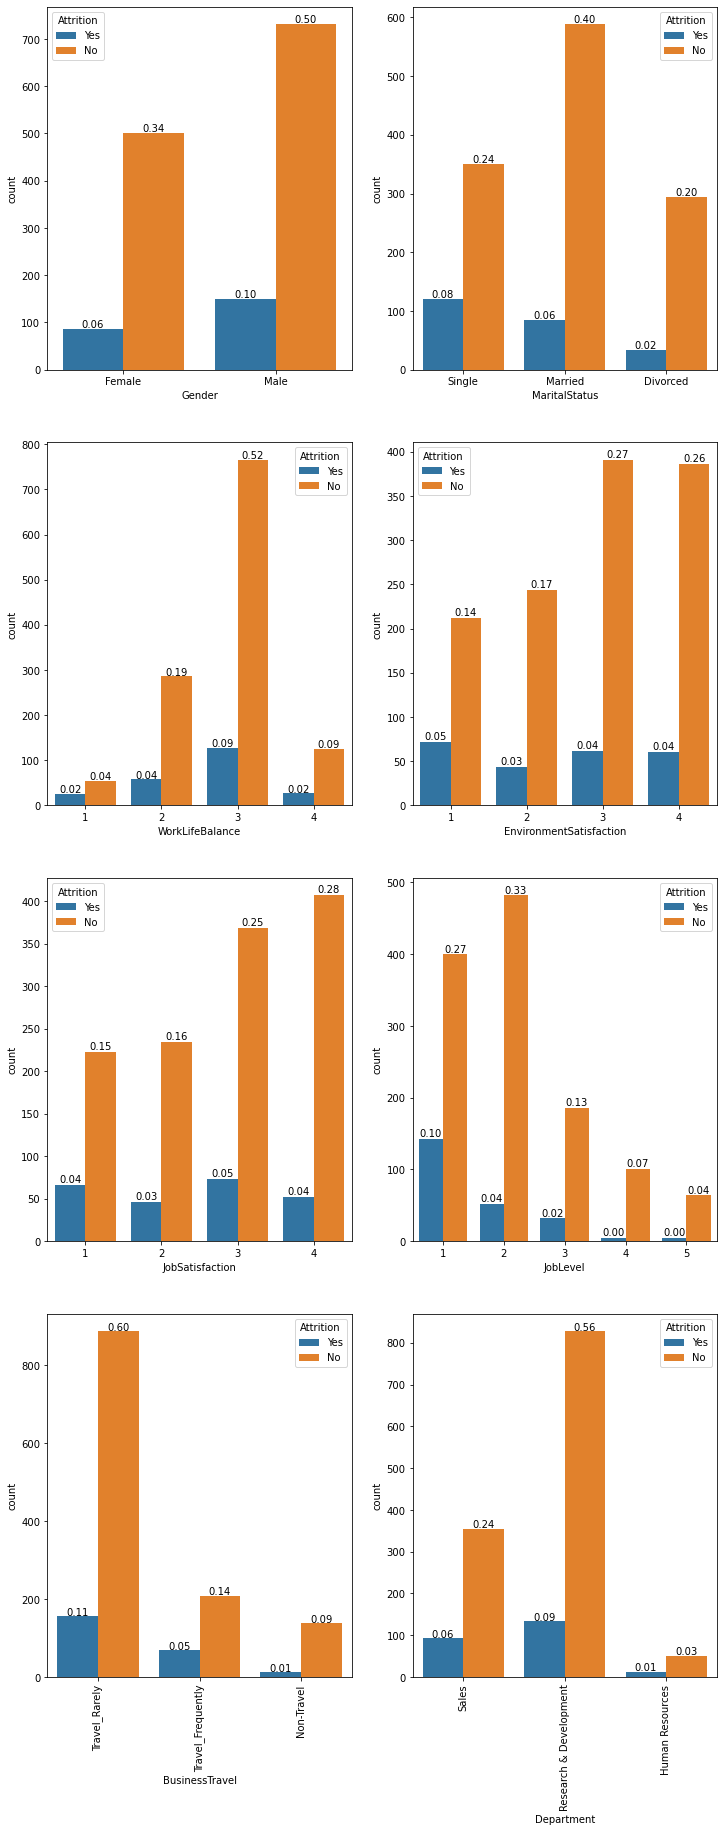

In [61]:
total_records= len(df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 
# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

### Observation of above Count Plot Graph
High attrition rate in given attribute

- Single attrition rate is 50% in marital status.
- Job Level -1 attrition rate is also high comapre to other job levels
- EnvironmentSatisfaction Level 1 has high attrition rate.
- Attrition raltes are high in these attribute Sales Deparment, Male,Jobsatisfaction 1

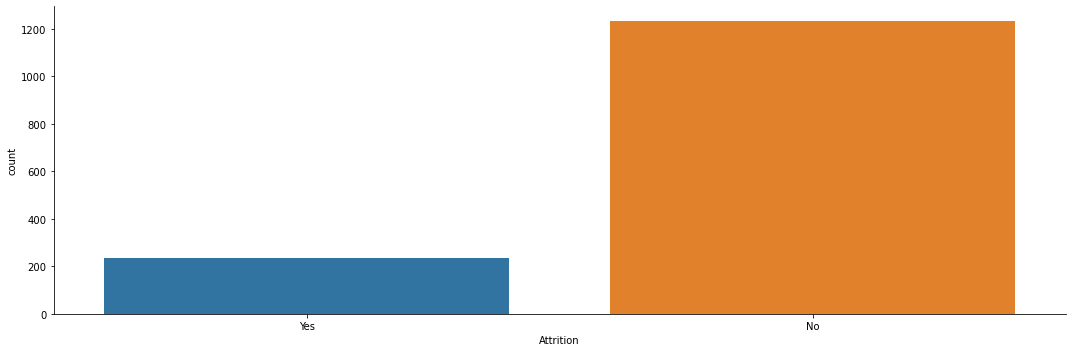

In [6]:
sns.factorplot(data = df, kind = 'count', aspect = 3, size = 5, x = 'Attrition')

**The above taken dataset is highly imbalanced one.**

<AxesSubplot:>

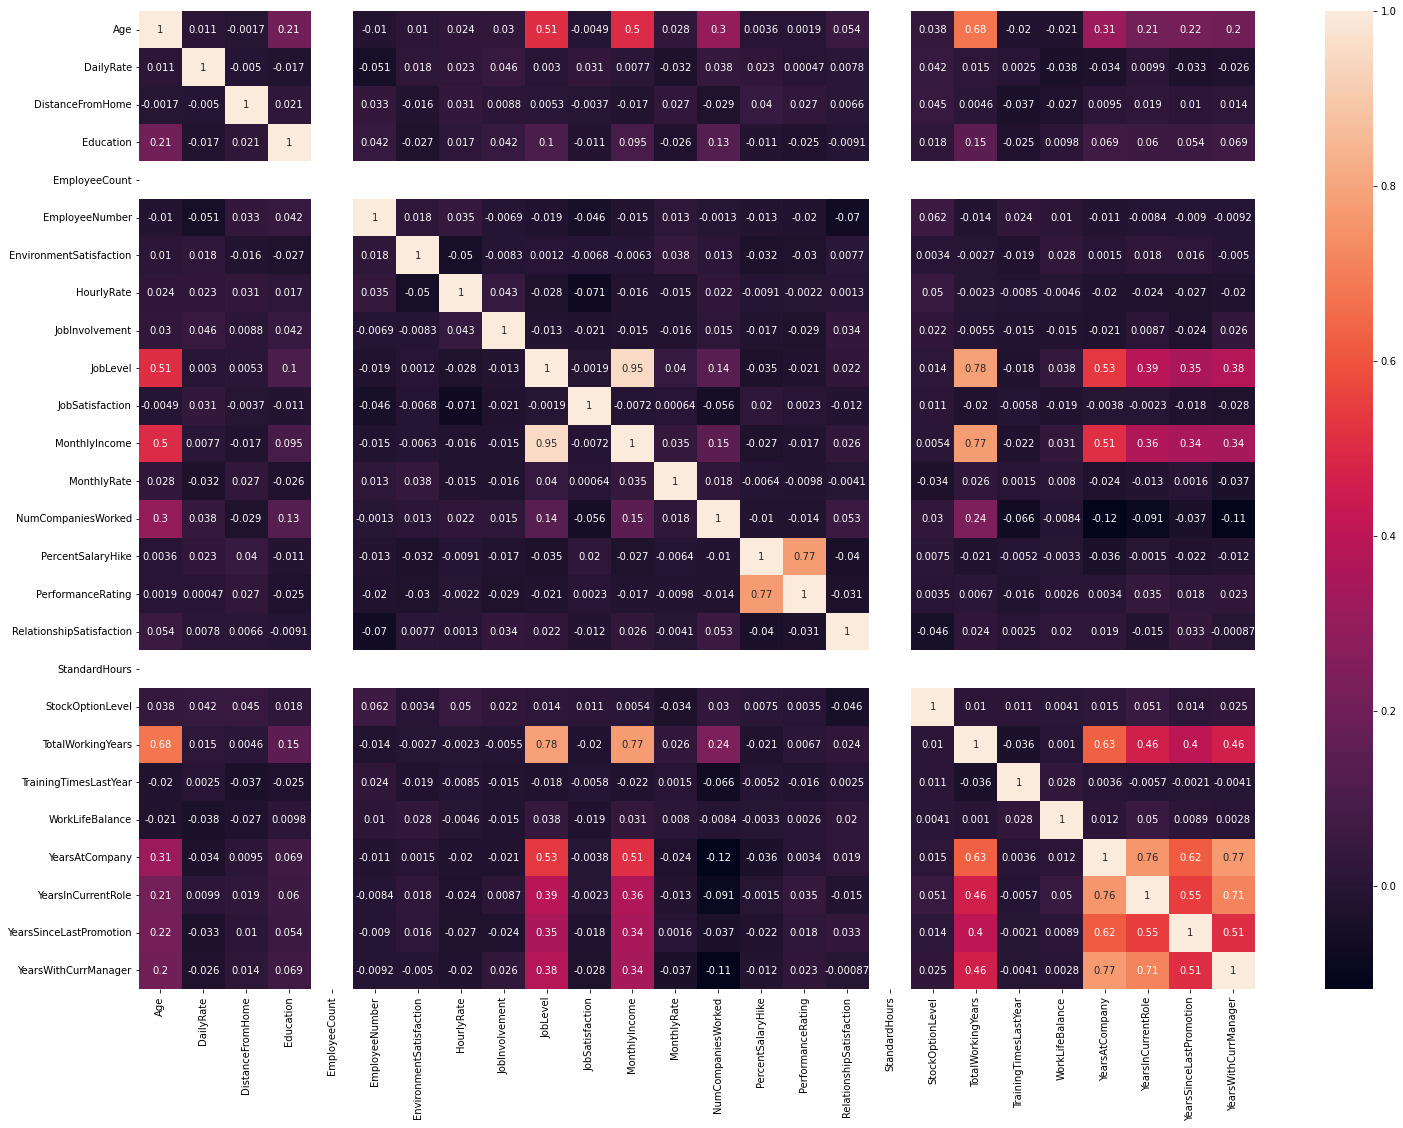

In [7]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(),annot=True)

**It can be see that there is high correlation between independent features such as (performace rating and percentage salary hike), (total working years and job level) etc, this situation can lead to multicollinearity which we need to take care of.**

### Feature Engineering

In [62]:
df.drop(['EmployeeNumber','StandardHours','Over18','EmployeeCount'],axis=1,inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
o=OrdinalEncoder()
l=LabelEncoder()

**LABEL ENCODING:**

In [64]:
#Encoding independent features with ordinal encoder
for i in df.columns:
    if df[i].dtypes=='O' and i!='Attrition':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

#Encoding label column with label encoder
df['Attrition']=l.fit_transform(df['Attrition'])

**Removing Outliers**

In [65]:
def outliersz(z):
    for i in np.arange(3,5,0.2):
        data=df.copy()
        data=data[(z<i).all(axis=1)]
        loss=(df.shape[0]-data.shape[0])/df.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [66]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
outliersz(z)

With threshold 3.0 data loss is 5.65%
With threshold 3.2 data loss is 4.22%
With threshold 3.4 data loss is 3.13%
With threshold 3.6 data loss is 2.72%
With threshold 3.8 data loss is 1.77%
With threshold 4.0 data loss is 0.88%
With threshold 4.2 data loss is 0.68%
With threshold 4.4 data loss is 0.34%
With threshold 4.6 data loss is 0.27%
With threshold 4.8 data loss is 0.14%


In [67]:
df=df[(z<4.8).all(axis=1)]

In [68]:
df.shape

(1468, 31)

**Removing Skewness from Data**

In [14]:
# square root method to remove method for all the continuous variables except for monthly income as it is incapable of it.
for i in df.columns:
    if np.abs(df[i].skew())>0.5 and i!='MonthlyIncome':
        df[i]=np.sqrt(df[i])

In [15]:
#Using log method to remove skewness from Monthly income
df['MonthlyIncome']=np.log(df['MonthlyIncome'])

In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**Separating the dependent and independent variables**

In [17]:
x=df.copy()
x.drop('Attrition',axis=1,inplace=True)
y=df['Attrition']

In [18]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [19]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

### Modelling without balancing:

In [20]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [22]:
#Function to find the best random state
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [23]:
#Splitting data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [24]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0),ExtraTreesClassifier()]

In [25]:
#To evakuate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [26]:
#Creates and trains model from the models list
def createmodel(trainx,testx,trainy,testy):
    for i in models:
        model=i
        model.fit(trainx,trainy)
        p=model.predict(testx)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,testy,model,testx,score)


In [27]:
createmodel(xtrain,xtest,ytrain,ytest)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.8283
----------------------------------------------------------
Mean of Cross Validation Score 0.8161
----------------------------------------------------------
AUC_ROC Score 0.7917
----------------------------------------------------------
Confusion Matrix
[[271  22]
 [ 41  33]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       293
         1.0       0.60      0.45      0.51        74

    accuracy                           0.83       367
   macro avg       0.73      0.69      0.70       367
weighted avg       0.81      0.83      0.82       367

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.861
----------------------------------------------------------
Mean of Cross Validation Score 0.8488
----

### Sampling with SMOTE:

In [28]:
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
over=SMOTE()
x,y=over.fit_resample(x,y)

In [29]:
#Splitting data into train and test
x1train,x1test,y1train,y1test=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [30]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0),ExtraTreesClassifier()]

In [31]:
createmodel(x1train,x1test,y1train,y1test)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7289
----------------------------------------------------------
Mean of Cross Validation Score 0.7196
----------------------------------------------------------
AUC_ROC Score 0.812
----------------------------------------------------------
Confusion Matrix
[[203  77]
 [ 90 246]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.71       280
         1.0       0.76      0.73      0.75       336

    accuracy                           0.73       616
   macro avg       0.73      0.73      0.73       616
weighted avg       0.73      0.73      0.73       616

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.836
----------------------------------------------------------
Mean of Cross Validation Score 0.8247
-----

In [55]:
etc_model=models[-1].fit(x1train,y1train)
p=etc_model.predict(x1test)
score=cross_val_score(etc_model,x,y,cv=10)
performance(p,y1test,etc_model,x1test,score)

------------------------------------ ExtraTreesClassifier() ------------------------------------
Accuracy 0.9643
----------------------------------------------------------
Mean of Cross Validation Score 0.947
----------------------------------------------------------
AUC_ROC Score 0.9957
----------------------------------------------------------
Confusion Matrix
[[281  10]
 [ 12 313]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       291
         1.0       0.97      0.96      0.97       325

    accuracy                           0.96       616
   macro avg       0.96      0.96      0.96       616
weighted avg       0.96      0.96      0.96       616



## Feature Importance

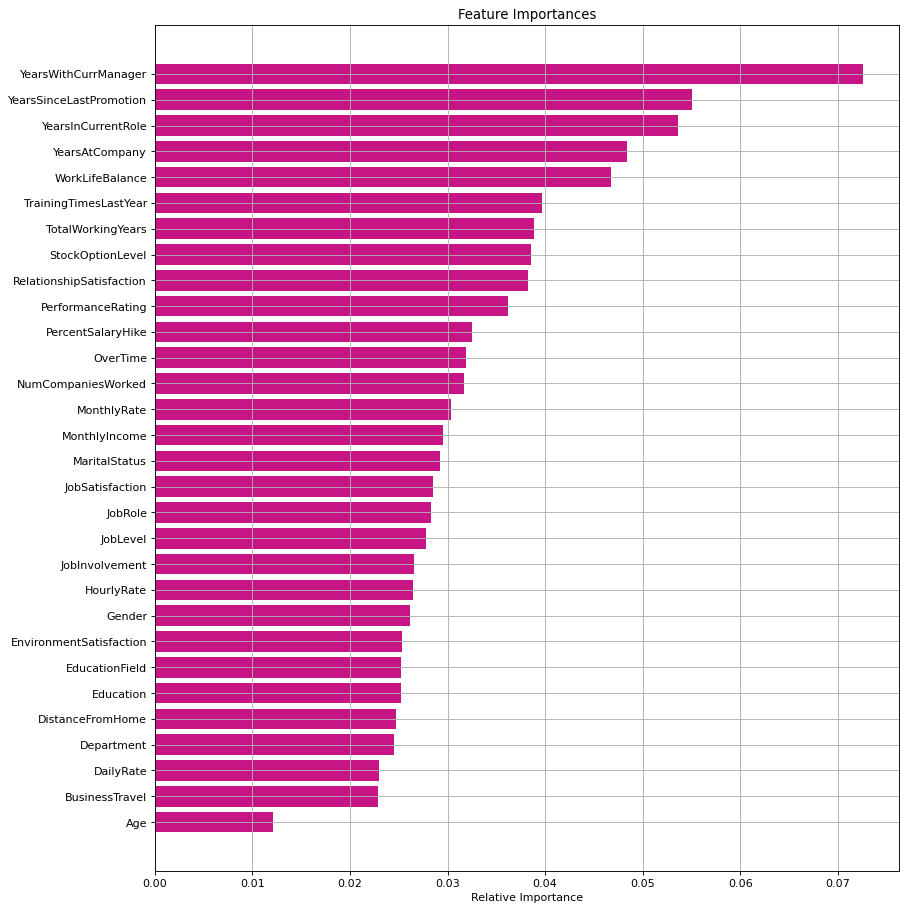

In [56]:
def plot_feature_importances(importances, features):
    # get the importance rating of each feature and sort it
    indices = np.argsort(importances)

    # make a plot with the feature importance
    plt.figure(figsize=(12,14), dpi= 80, facecolor='w', edgecolor='k')
    plt.grid()
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], height=0.8, color='mediumvioletred', align='center')
    plt.yticks(range(len(indices)), list(features))
    plt.xlabel('Relative Importance')
    plt.show()

plot_feature_importances(etc_model.feature_importances_, x1test.columns)

### Sampling with ADASYN:

In [33]:
x1=df.copy()
x1.drop('Attrition',axis=1,inplace=True)
y1=df['Attrition']

In [34]:
#Over Sampling the data using ADASYN
from imblearn.over_sampling import ADASYN
over=ADASYN()
x,y=over.fit_resample(x1,y1)

In [35]:
#Splitting data into train and test
x2train,x2test,y2train,y2test=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [36]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0),ExtraTreesClassifier()]

In [37]:
createmodel(x2train,x2test,y2train,y2test)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7894
----------------------------------------------------------
Mean of Cross Validation Score 0.765
----------------------------------------------------------
AUC_ROC Score 0.8736
----------------------------------------------------------
Confusion Matrix
[[233  44]
 [ 83 243]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79       277
         1.0       0.85      0.75      0.79       326

    accuracy                           0.79       603
   macro avg       0.79      0.79      0.79       603
weighted avg       0.80      0.79      0.79       603

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.7114
----------------------------------------------------------
Mean of Cross Validation Score 0.6865
----

In [38]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

In [39]:
model=Sequential()
model.add(Dense(input_dim=30,units=100,activation='relu'))
model.add(Dense(units=75,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=45,activation='relu'))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [40]:
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 45)                2295      
                                                                 
 dense_4 (Dense)             (None, 25)                1150      
                                                                 
 dense_5 (Dense)             (None, 15)                390       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [42]:
# Our vectorized labels
History=model.fit(x1train,y1train,validation_data=(x1test,y1test),epochs=25,verbose=1)

Epoch 1/25
58/58 [==============================] - 4s 7ms/step - loss: 0.5736 - accuracy: 0.6899 - val_loss: 0.4845 - val_accuracy: 0.7857
Epoch 2/25
58/58 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7511 - val_loss: 0.4018 - val_accuracy: 0.8295
Epoch 3/25
58/58 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7668 - val_loss: 0.4291 - val_accuracy: 0.8068
Epoch 4/25
58/58 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.7992 - val_loss: 0.3919 - val_accuracy: 0.8409
Epoch 5/25
58/58 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7814 - val_loss: 0.4879 - val_accuracy: 0.8344
Epoch 6/25
58/58 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.7982 - val_loss: 0.3685 - val_accuracy: 0.8442
Epoch 7/25
58/58 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8225 - val_loss: 0.3566 - val_accuracy: 0.8393
Epoch 8/25
58/58 [==

### Employee attrition Rate Prediction Using Regression:

**To find the probability at which a particular employee attrites from a company**

In [43]:
# train_dataset_path = r"C:\Users\Aishwarya\Desktop\FINAL PROJECT\IMPLEMENTATION\Train.csv"
# test_dataset_path  = r"C:\Users\Aishwarya\Desktop\FINAL PROJECT\IMPLEMENTATION\Test (2).csv"

In [44]:
# # Data manipulation libraries
# import pandas as pd
# import numpy as np

# # Data visualistaion libraries
# import seaborn as sns
# import matplotlib.pyplot as plt
# pd.plotting.register_matplotlib_converters()
# %matplotlib inline

# # Machine learning libraries
# from sklearn.metrics import mean_absolute_error,mean_squared_error
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# # Machine Learning Models
# from sklearn.ensemble import RandomForestRegressor

In [45]:
# #training and testing data
# training_dataframe = pd.read_csv(train_dataset_path,index_col="Employee_ID")
# #testing_dataframe  = pd.read_csv(test_dataset_path,index_col ="Employee_ID")

### Data Exploration:

In [46]:
# training_dataframe.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education_Level'}>,
        <AxesSubplot:title={'center':'Time_of_service'}>,
        <AxesSubplot:title={'center':'Time_since_promotion'}>],
       [<AxesSubplot:title={'center':'growth_rate'}>,
        <AxesSubplot:title={'center':'Travel_Rate'}>,
        <AxesSubplot:title={'center':'Post_Level'}>,
        <AxesSubplot:title={'center':'Pay_Scale'}>],
       [<AxesSubplot:title={'center':'Work_Life_balance'}>,
        <AxesSubplot:title={'center':'VAR1'}>,
        <AxesSubplot:title={'center':'VAR2'}>,
        <AxesSubplot:title={'center':'VAR3'}>],
       [<AxesSubplot:title={'center':'VAR4'}>,
        <AxesSubplot:title={'center':'VAR5'}>,
        <AxesSubplot:title={'center':'VAR6'}>,
        <AxesSubplot:title={'center':'VAR7'}>],
       [<AxesSubplot:title={'center':'Attrition_rate'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

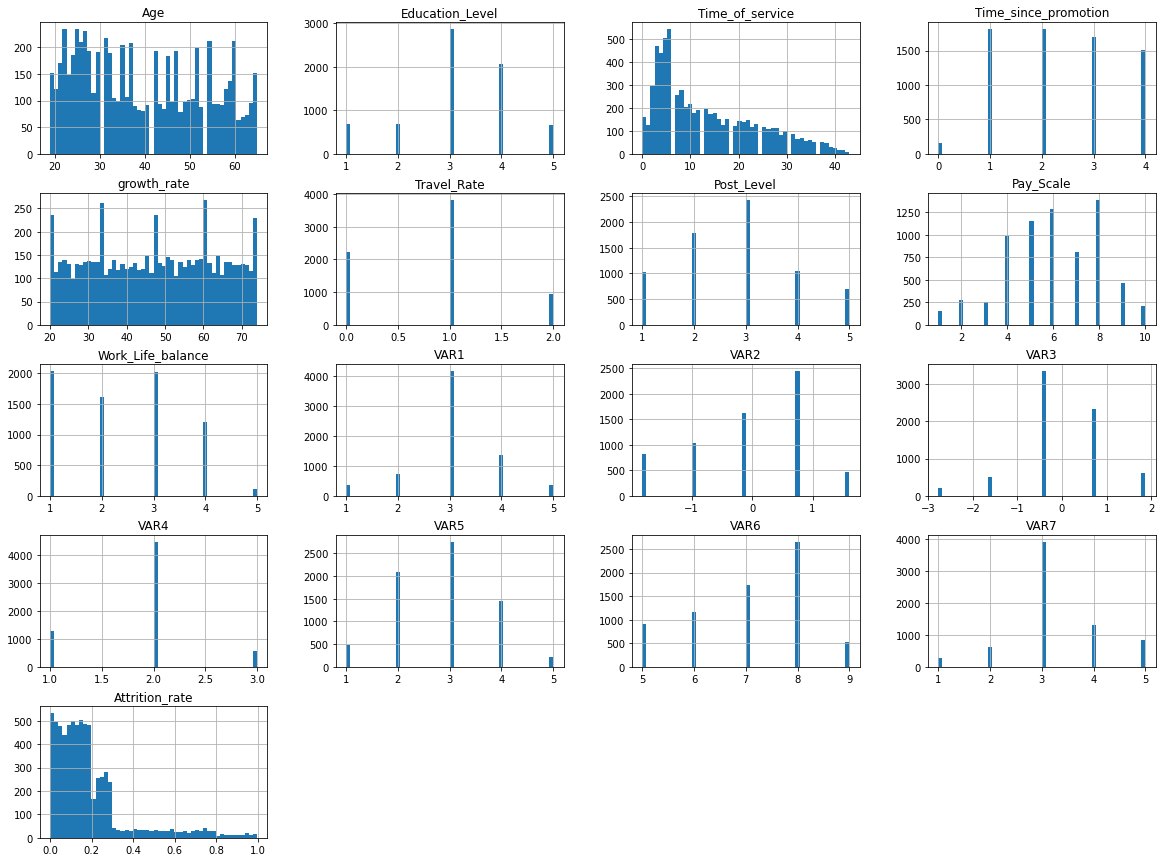

In [47]:
# # Data Distribution
# training_dataframe.hist(bins = 50, figsize = (20,15))

In [48]:
# # All the columns
# print(training_dataframe.columns)

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate'],
      dtype='object')


In [49]:
# training_dataframe.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


#### Data-Preprocessing

To deal with columns having missing values we will perform imputation on the column with missing data.

In [50]:
# ## Columns with missing values
# cols_with_missing = [col for col in training_dataframe.columns if training_dataframe[col].isnull().any()]
# print(cols_with_missing)

['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']


Before imputation we have to check for categorical values.

#### Categorical values:

In [51]:
# # Get a list of categorical columns

# s = (training_dataframe.dtypes == 'object')
# object_cols = list(s[s].index)
# print(object_cols)

['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']


In [52]:
# # Remove rows with missing target, separate target from predictors in training data
# X_train_full = training_dataframe
# X_train_full.dropna(axis=0, subset=['Attrition_rate'], inplace=True, how = "any")
# y_train_full = X_train_full.Attrition_rate
# # X_train_full.drop(['Attrition_rate'], axis=1, inplace=True)

# X_train_full.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


Fitting a label encoder to a column in the training data creates a corresponding integer-valued label for each unique value that appears in the training data.

In [53]:
# X_valid_full = testing_dataframe
# labelEncoder = LabelEncoder()
# for col in object_cols:
#     X_train_full[col] = labelEncoder.fit_transform(X_train_full[col])
#     X_valid_full[col] = labelEncoder.transform(X_valid_full[col])

NameError: name 'testing_dataframe' is not defined

In [ ]:
# X_train_full.head()

#### Imputation: 

In [ ]:
# si = SimpleImputer(strategy='most_frequent')
# X_train_imputed = pd.DataFrame(si.fit_transform(X_train_full))
# # It is important to fit_transform the training data
# X_train_imputed.columns = X_train_full.columns
# # X_train_imputed.index = X_train_full.index
# print("shape of X_train_imputed = ",X_train_imputed.shape)
# X_train_imputed.head()

### Data Visualization and analysis:

#### Attrition rate and Age:

In [ ]:
# data = X_train_imputed
# plt.figure(figsize=(20,6))
# plt.title("Attrition Rate Vs Age")
# sns.lineplot(y=data["Attrition_rate"],x=data["Age"])

**From this trend it is evident that employee attrition rate is more profound between the age of 35 to 40. This may be due to a variety of factors such as low work life ballance or less job satisfaction**

#### Attrition rate and Time_Since_LastPromotion:

In [ ]:
# plt.figure(figsize=(20,6))
# plt.title("Attrition Rate Vs time_since_promotion")
# sns.lineplot(y=data["Attrition_rate"],x=data["Time_since_promotion"])

**We see that the attrition rate linearly dependent on the time since last promotion but increases a little bit if gap increases more than 3.5 years**

#### Attrition Rate of Male&Female Employees:

In [ ]:
# plt.figure(figsize= (8,6))
# plt.title("Attrition Rate Vs Gender")
# sns.barplot(y=data["Attrition_rate"],x=data["Gender"])
# plt.legend(title='Gender', loc='lower left', labels=['Male : 1', 'Female : 0'])

**From this bar plot it is evident that that Male are more likely to leave an organisation than their female counterparts. Still, the difference is not huge enough to have any signifigant contribution to the attrition rates**

#### Attrition VS Education:

In [ ]:
# plt.figure(figsize=(20,6))
# plt.title("Attrition Rate Vs eductaion_level")
# sns.lineplot(y=data["Attrition_rate"],x=data["Education_Level"])

**From the plot it is evident that attrition rates increases with a low level of education but the curve flatens out with an increase in the level of education. This might an important feature for predicting our target variable.**

#### Attrition VS work_life_balance

In [ ]:
# plt.figure(figsize= (15,10))
# plt.title("Attrition Rate Vs Work life balance")
# sns.barplot(y=data["Attrition_rate"],x=data["Work_Life_balance"])

In [ ]:
# plt.figure(figsize=(20,6))
# plt.title("Attrition Rate Vs work_life_balance")
# sns.lineplot(y=data["Attrition_rate"],x=data["Work_Life_balance"])

**According to our assumption work life balance does count towards the attrition rates of employees. There is a slight increase in the rates with an increase in work_life_balance value. There is a linear relation between the two.**



#### Attrition VS Pay_scale:

In [ ]:
# plt.figure(figsize=(20,6))
# plt.title("Attrition Rate Vs Pay scale")
# sns.lineplot(y=data["Attrition_rate"],x=data["Pay_Scale"])

In [ ]:
# plt.figure(figsize= (15,10))
# plt.title("Attrition Rate Vs Pay_scale")
# sns.barplot(y=data["Attrition_rate"],x=data["Pay_Scale"])

**Initially there is a increase in attrition rates with respect to pay scale (till 3) then it slowly decreases and becomes stable over rest of the values and decreases beyond 8. Pay scale will be an interesting feature for our model.**

#### Attrition Rate VS Job_unit:

In [ ]:
# plt.figure(figsize= (15,10))
# plt.title("Attrition Rate Vs Job Unit")
# sns.barplot(y=data["Attrition_rate"],x=data["Unit"])

**Thus the job department or unit such as IT, logistics, Quality control and HR is a good feature for prediction of our target.**

#### Attrition vs Compensation_and_Benefits

In [ ]:
# plt.figure(figsize= (15,10))
# plt.title("Attrition Rate Vs Compensation_and_Benefits")
# sns.barplot(y=data["Attrition_rate"],x=data["Compensation_and_Benefits"])

**This shows that compensation and benefits are an important factor in deciding employee attrition rates.**

In [ ]:
# plt.title("Attrition Rate Vs Anominised variables")
# sns.lineplot(y=data["Attrition_rate"],x=data["VAR1"])

In [ ]:
# plt.title("Attrition Rate Vs Anominised variables")
# lst=["VAR2","VAR3","VAR4","VAR5","VAR6","VAR7"]
# for i in lst:
#     sns.lineplot(y=data["Attrition_rate"],x=data[i])

### Correlation Matrix:

**Correlation states how the features are related to each other or the target variable. Heatmap makes it easy to identify which features are most related to the target variable**

In [ ]:
# corr_matrix = data.corr()
# corr_matrix["Attrition_rate"].sort_values(ascending = False)

In [ ]:
# sample_data = data
# plt.figure(figsize = (30,10))
# corr = sample_data.corr()
# ax = sns.heatmap(corr,vmin = -0.03,vmax = 0.03, center = 0,cmap=sns.diverging_palette(20, 220, n=200), square=True, linewidths = 0.5)

# # ax.set_xticklabels( ax.get_xticklabels(),rotation=45, horizontalalignment='right')

**From the last row of the correlation heat map we see the columns highly correlated to Attrition_rate are:**

- Gender
- Relationship_Status
- Hometown
- Unit
- Decision_skill_possess
- Time_since_promotion
- growth_rate
- Post_Level
- Work_Life_balance
- Compensation_and_Benefits
- VAR 2
- VAR 7
- Time of service
- Pay scale
- age
- Travel Rate

### Building the ML model:

#### Spliting the training_dataframe into training and testing subsets

In [ ]:
# features_4 =["Gender","Unit","Hometown","Relationship_Status","Work_Life_balance","Decision_skill_possess","Post_Level","growth_rate","Time_since_promotion","Travel_Rate",                 
# "Age","Pay_Scale","Time_of_service","Compensation_and_Benefits"] 

# X = data[features_4]
# y = data["Attrition_rate"]

# # Separating validation from training data
# train_X, val_X, train_y, val_y = train_test_split(X,y,train_size=0.7, test_size=0.3,random_state = 0)

#### Model_1 : Random Forest

In [ ]:
# param_random_tree = {"max_depth": [None],
#               "max_features": [10,15, 20, 30, 43],
#               "min_samples_split": [2, 3, 10,15],
#               "min_samples_leaf": [1, 3, 10,15],
#               "n_estimators" :[50,100,200,300,500]}

# random = RandomForestRegressor(random_state=42)
# clf = GridSearchCV(random, param_random_tree, cv=5,  scoring='neg_mean_squared_error',n_jobs= 4, verbose = 1)
# clf.fit(train_X, train_y)
# print(clf.best_estimator_)
# print(clf.best_score_)
# # (max_features=10, min_samples_leaf=15, n_estimators=500, random_state=42)

In [ ]:
# # Model selection and Training
# scores = {}
# random = RandomForestRegressor(max_features=10, min_samples_leaf=15, n_estimators=500, random_state=42)
# random.fit(train_X,train_y)
# model_rf_preds = random.predict(val_X)
# mae_score_rf = mean_absolute_error(val_y,model_rf_preds)
# rmse_rf = mean_squared_error(val_y, model_rf_preds, squared=False)
# print("Mean absolute error with Random Forest = ",mae_score_rf)
# print("Root mean square error with Random Forest = ",rmse_rf)
# print("Final Score for comp = ",100*(1-rmse_rf))
# score=100*(1-rmse_rf)
# scores['RF'] = score
# scores

#### Model_2 : XGBoost

In [ ]:
# import xgboost
# xgboost_params = {'max_features': [10,15, 20, 30],
#                   'n_estimators' :[25,50,100],
#                    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
#                   'gamma':[0.5, 0.1, 1, 10],
#                   'max_depth':[5, 10, 15]}

# xgb = xgboost.XGBRegressor(random_state=42)
# clf_xgb = GridSearchCV(xgb, xgboost_params, cv=5,  scoring='neg_mean_squared_error',n_jobs= 4, verbose = 1)
# clf_xgb.fit(train_X, train_y)
# print(clf_xgb.best_estimator_)
# print(clf_xgb.best_score_)
# scores['RF'] = score

In [ ]:
# xgbModel_updated = xgboost.XGBRegressor(gamma=1, random_state=42, max_depth=5, max_features=10,learning_rate=0.1, n_estimators=100)
# xgbModel_updated.fit(train_X,train_y)
# predictions_xgbModel_updated = xgbModel_updated.predict(val_X)
# mae_xgbModel_updated = mean_absolute_error(predictions_xgbModel_updated,val_y)
# print("MAE on updated XGB model wiht early stopping= ",mae_xgbModel_updated)
# xgbModel_updated_rmse = mean_squared_error(predictions_xgbModel_updated,val_y,squared = False)
# print("RMSE on xgbModel with early stopping= ",xgbModel_updated_rmse)
# print("Final Score for comp = ",100*(1-xgbModel_updated_rmse))
# score=100*(1-xgbModel_updated_rmse)
# scores['XGB'] = score
# scores

#### Model_3 : LightGBM

In [ ]:
# import lightgbm as lgb
# lightgbm_params ={'learning_rate':[0.0001, 0.001, 0.003, 0.01, 0.1],
#                   'n_estimators':[10,20, 50, 100],
#                  'max_depth':[4, 6, 10, 15, 20, 50]}
# gbm = lgb.LGBMRegressor(random_state = 42)
# clf_gbm = GridSearchCV(gbm, lightgbm_params, cv=5,  scoring='neg_mean_squared_error',n_jobs= 4, verbose = 1)
# clf_gbm.fit(train_X, train_y)
# print(clf_gbm.best_estimator_)
# print(clf_gbm.best_score_)

In [ ]:
# lgbModel_updated = lgb.LGBMRegressor(random_state = 42, learning_rate=0.01, max_depth=4, n_estimators=50)
# lgbModel_updated.fit(train_X,train_y)
# predictions_lgbModel_updated = lgbModel_updated.predict(val_X)
# mae_lgbModel_updated = mean_absolute_error(predictions_lgbModel_updated,val_y)
# print("MAE on updated LGBM model wiht early stopping= ",mae_lgbModel_updated)
# lgbModel_updated_rmse = mean_squared_error(predictions_lgbModel_updated,val_y,squared = False)
# print("RMSE on LgbModel with early stopping= ",lgbModel_updated_rmse)
# print("Final Score for comp = ",100*(1-lgbModel_updated_rmse))
# score=100*(1-lgbModel_updated_rmse)
# scores['LGB'] = score
# scores

#### Model_4 : AdaBoost

In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# adam_boosting_params = {'learning_rate':[0.0001, 0.001, 0.003, 0.01, 0.1,1],
#                         'n_estimators':[10,20, 50, 100]}
# ada = AdaBoostRegressor(random_state=42)
# clf_ada = GridSearchCV(ada, adam_boosting_params, cv=5,  scoring='neg_mean_squared_error',n_jobs= 4, verbose = 1)
# clf_ada.fit(train_X, train_y)
# print(clf_ada.best_estimator_)
# print(clf_ada.best_score_)

In [ ]:
# adaModel_updated = AdaBoostRegressor(random_state=42, learning_rate=0.001, n_estimators=100)
# adaModel_updated.fit(train_X,train_y)
# predictions_adaModel_updated = adaModel_updated.predict(val_X)
# mae_adaModel_updated = mean_absolute_error(predictions_adaModel_updated,val_y)
# print("MAE on updated ADA model wiht early stopping= ",mae_adaModel_updated)
# adaModel_updated_rmse = mean_squared_error(predictions_adaModel_updated,val_y,squared = False)
# print("RMSE on LgbModel with early stopping= ",adaModel_updated_rmse)
# print("Final Score for comp = ",100*(1-adaModel_updated_rmse))
# score=100*(1-adaModel_updated_rmse)
# scores['AdaBoost'] = score


### Elastic Net:

In [ ]:
# from sklearn.linear_model import ElasticNet
# en_model = ElasticNet(alpha = 0.01, l1_ratio = 0.8)   # l1_ratio is the ratio of ridge and lasso regression. Here 20:80
# en_model.fit(train_X,train_y)
# en_model_prediction = en_model.predict(val_X)
# en_model_mae = mean_absolute_error(en_model_prediction,val_y)
# print("MAE on Elastic Net regression model= ",en_model_mae)
# en_model_rmse = mean_squared_error(en_model_prediction,val_y,squared = False)
# print("RMSE on Elastic Net regression model= ",en_model_rmse)
# print("Final Score for comp = ",100*(1-en_model_rmse))
# scores['ElasticNet'] = score
# scores

### Support Vector Machines:

In [ ]:
# # Linear Support Vector Regression

# from sklearn.svm import LinearSVR
# linear_svr_model = LinearSVR(epsilon = 1.5)
# linear_svr_model.fit(train_X,train_y)
# linear_svr_model_pred = linear_svr_model.predict(val_X)
# linear_svr_model_mae = mean_absolute_error(linear_svr_model_pred,val_y)
# print("MAE on Linear Support Vector regression model= ",linear_svr_model_mae)
# linear_svr_model_rmse = mean_squared_error(linear_svr_model_pred,val_y,squared = False)
# print("RMSE on Linear Support Vector regression model= ",linear_svr_model_rmse)
# print("Final Score for comp = ",100*(1-linear_svr_model_rmse))

In [ ]:
# # SVR with poly kernel

# from sklearn.svm import SVR
# svr_model = SVR(kernel = "poly",epsilon = 0.1)
# svr_model.fit(train_X,train_y)
# svr_model_pred = svr_model.predict(val_X)
# svr_model_mae = mean_absolute_error(svr_model_pred,val_y)
# print("MAE on Support Vector regression model with poly kernel= ",svr_model_mae)
# svr_model_rmse = mean_squared_error(svr_model_pred,val_y,squared = False)
# print("RMSE on Support Vector regression model with poly kernel= ",svr_model_rmse)
# print("Final Score for comp = ",100*(max(0,1-svr_model_rmse)))
# score=100*(max(0,1-svr_model_rmse))
# scores['SVR_POLY'] = score
# scores

### PoissonRegressor:

In [ ]:
# from sklearn.linear_model import PoissonRegressor

# pr_model = PoissonRegressor(max_iter=300)
# pr_model.fit(train_X,train_y)
# pr_model_pred = pr_model.predict(val_X)
# pr_model_mae = mean_absolute_error(pr_model_pred,val_y)
# print("MAE on Poisson regression model = ",pr_model_mae)
# pr_model_rmse = mean_squared_error(pr_model_pred,val_y,squared = False)
# print("RMSE on Poisson regression model = ",pr_model_rmse)
# print("Final Score for comp = ",100*(max(0,1-pr_model_rmse)))
# score=100*(max(0,1-pr_model_rmse))
# scores['PoissonRegressor'] = score
# scores

In [ ]:
# def alpha_tuning_pr(x):
#     test_model  = PoissonRegressor(alpha = x,max_iter = 300)
#     test_model.fit(train_X,train_y)
#     test_pred = test_model.predict(val_X)
#     test_rmse = mean_squared_error(pr_model_pred,val_y,squared = False)
#     return test_rmse
    

In [ ]:
# rmse_list_pr= []
# alpha_list_pr = []
# a = 0;
# for i in np.arange(1e-15,9e-15, 1e-15):
#     rmse_list_pr.append(alpha_tuning_pr(i))
#     alpha_list_pr.append(i)
#     plt.plot(i,alpha_tuning_pr(i),'bo')
    
# plt.title("RMSE vs alpha for Poisson Regression")
# plt.xlabel("alpha")
# plt.ylabel("RMSE")

**Generally the RSME score doesnt change much with respect to the alpha value of the Poisson Regression model**

### TweedieRegressor 

In [ ]:
# from sklearn.linear_model import TweedieRegressor
# tr_model = TweedieRegressor(power=0, alpha=1, link='log')
# tr_model.fit(train_X,train_y)
# tr_model_pred = tr_model.predict(val_X)
# tr_model_mae = mean_absolute_error(tr_model_pred,val_y)
# print("MAE on TweedieRegressor_model = ",tr_model_mae)
# tr_model_rmse = mean_squared_error(tr_model_pred,val_y,squared = False)
# print("RMSE on TweedieRegressor_model = ",tr_model_rmse)
# print("Final Score for comp = ",100*(max(0,1-tr_model_rmse)))
# score=100*(max(0,1-tr_model_rmse))
# scores['TweedirRegressor'] = score
# scores

In [ ]:
# # input dictionary
# inputDictionary = scores
# # creating an empty list
# resultList = []
# result1=[]
# # traversing through each key value pair of a dictionary using items() function
# for key, val in inputDictionary.items():
#     resultList.append(key)
#     result1.append(val)
# # printing the resultant list of a dictionary key-values
# print(resultList)
# print(result1)

In [ ]:
# df= pd.DataFrame()
# list1 = list(range(10))
# list2 = list(range(10,20))
# df['ALGORITHM'] = resultList
# df['SCORES'] = result1
# df

In [ ]:
#import pickle

In [ ]:
# with open('etc_model_pickle.pkl','wb') as f:
#     pickle.dump(etc_model, f)

In [ ]:
# with open('tweedy_regressor_pickle.pkl','wb') as f:
#     pickle.dump(etc_model, f) 